# Session 4: Performance measurement 

## Maximum drawdown 

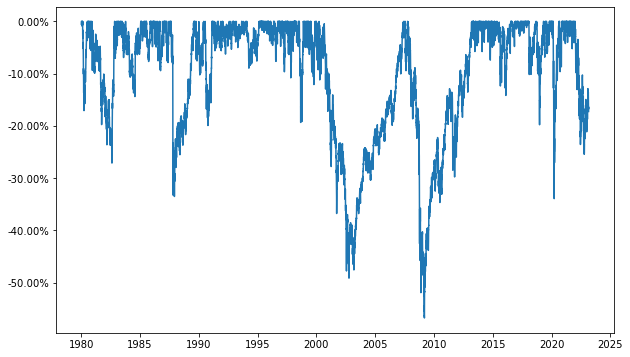

In [6]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings

warnings.simplefilter('ignore')

#os.chdir(r'C:\Users\cdes1\OneDrive - ICHEC\Documents\Cours\PortfolioManagement')
os.chdir(r'/Users/christophe/OneDrive - ICHEC/Documents/Cours/PortfolioManagement')

df = pd.read_csv('data/SP500.csv', index_col=0, parse_dates=True)

rets = df.pct_change().dropna()
dates = df.index[1:]
# convert to numpy  
rets = np.array(rets[rets.columns[0]])
drawdown = np.zeros_like(rets)
max_DD = np.zeros_like(rets)
to_through = np.zeros_like(rets)
recovery = np.zeros_like(rets) 

runs = []

# initialisation at first date 
drawdown[0] = rets[0]
max_DD[0] = rets[0]
to_through[0] = 1 

length = 1
to_through = 1
start = dates[0]
start_t = 0 
bottom = dates[0]
bottom_t = 0 

for t in range(1, len(rets)):
    cum_r = (1+drawdown[t-1])*(1+rets[t])-1
    drawdown[t] = np.minimum(0, cum_r)
    # on continue la serie 
    if (drawdown[t] < 0) and (t < len(rets)-1):   
        length = length + 1
        if max_DD[t-1] < drawdown[t]:
            max_DD[t] = max_DD[t-1]
        else:
            max_DD[t] = drawdown[t] 
            bottom = dates[t]
            bottom_t = t
        
    else: # on recommence une serie
        # on stocke toutes les infos
        to_through = bottom_t - start_t
        recovery = t - bottom_t 
        end = dates[t]
        if t == len(rets)-1:
            end = np.NAN # we have not recover yet 
        infos = {'start': start,
                 'bottom': bottom,
                 'end': end,
                 'to_through': to_through,
                 'recovery': recovery,
                 'nbDays': length,
                 'maxDD': max_DD[t-1]}
        runs.append(infos)
        # puis on reinitialise les variables  
        length = 1
        start = dates[t]
        start_t = t
        bottom_t = t
        
df_dd = pd.DataFrame(data=drawdown, index=dates, columns=['Drawdown'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_dd['Drawdown'])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals]);

In [9]:
df_runs = pd.DataFrame(runs)
df_runs.sort_values(by='maxDD', ascending=True, inplace=True)
df_runs.head(n=10)

start     bottom        end  to_through  recovery  nbDays     maxDD
531 2007-10-09 2009-03-09 2013-03-28         355      1021    1376 -0.567754
522 2000-03-24 2002-10-09 2007-05-30         637      1166    1803 -0.491469
786 2020-02-19 2020-03-23 2020-08-18          23       103     126 -0.339250
195 1987-08-25 1987-12-04 1989-07-26          71       414     485 -0.335095
42  1980-11-28 1982-08-12 1982-11-03         430        58     488 -0.271136
877 2022-01-03 2022-10-12        NaT         195        92     287 -0.254251
214 1990-07-16 1990-10-11 1991-02-13          62        86     148 -0.199187
738 2018-09-20 2018-12-24 2019-04-23          65        81     146 -0.197782
477 1998-07-17 1998-08-31 1998-11-23          31        59      90 -0.193360
17  1980-02-13 1980-03-27 1980-07-14          30        74     104 -0.170719